## Question 1


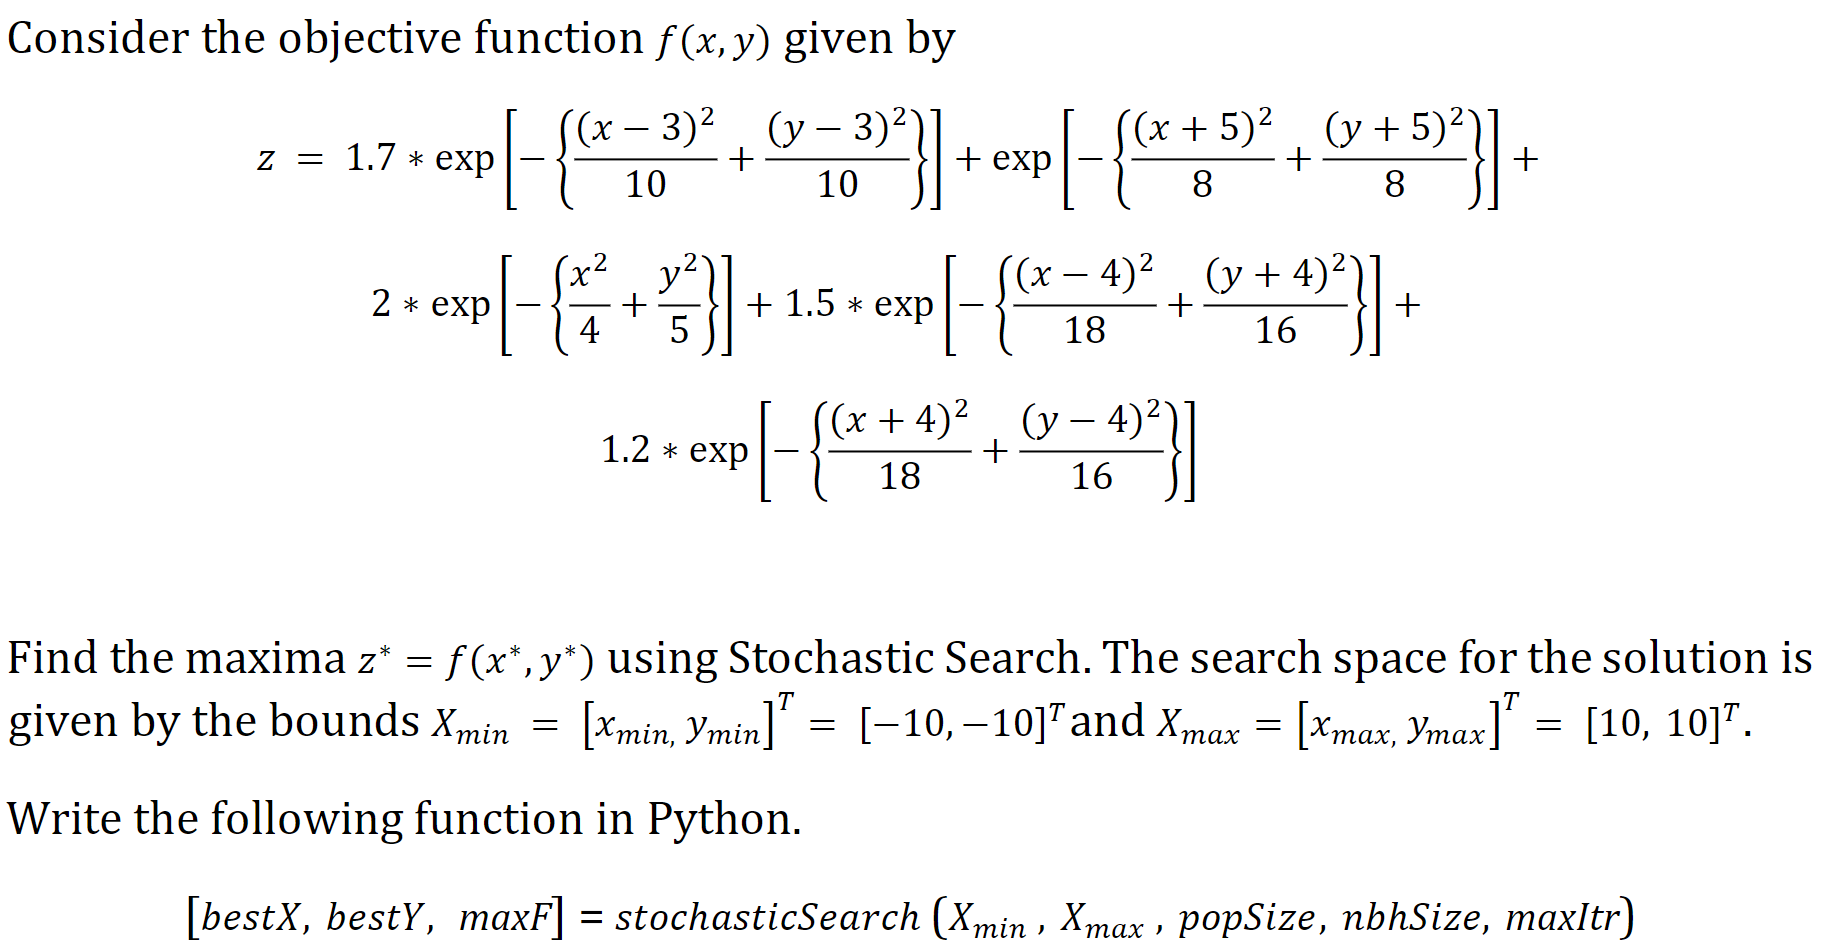

In [145]:
import numpy as np
import matplotlib.pyplot as plt

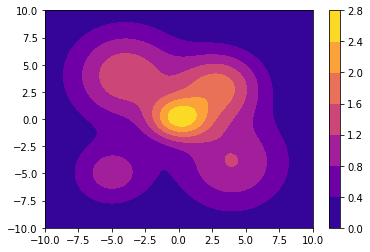

In [146]:
n = 200
x_min = -10
x_max = 10

X = np.linspace(-10,10,n)
Y = np.linspace(-10,10,n)
Z = []
for x in X:
    for y in Y:
        sum = -1*(((x-3)**2)/10 + ((y-3)**2)/10)
        z1 = 1.7*np.exp(sum)
        sum = -1*(((x+5)**2)/8 + ((y+5)**2)/8)
        z2 = 1*np.exp(sum)
        sum = -1*(((x)**2)/4 + ((y)**2)/5)
        z3 = 2*np.exp(sum)
        sum = -1*(((x-4)**2)/18 + ((y+4)**2)/16)
        z4 = 1.5*np.exp(sum)
        sum = -1*(((x+4)**2)/18 + ((y-4)**2)/16)
        z5 = 1.2*np.exp(sum)
        z = z1+z2+z3+z4+z5
        Z.append(z)
Z = np.array(Z)
#print(len(Z))
map_X,map_Y = np.meshgrid(X,Y)
map_Z = Z.reshape(map_X.shape)
plt.contourf(map_X,map_Y,map_Z,cmap = 'plasma')
plt.colorbar()
plt.show()

In [147]:
def eval(X):
    x = X[:,0]
    y = X[:,1]
    sum = -1*(((x-3)**2)/10 + ((y-3)**2)/10)
    z1 = 1.7*np.exp(sum)
    sum = -1*(((x+5)**2)/8 + ((y+5)**2)/8)
    z2 = 1*np.exp(sum)
    sum = -1*(((x)**2)/4 + ((y)**2)/5)
    z3 = 2*np.exp(sum)
    sum = -1*(((x-4)**2)/18 + ((y+4)**2)/16)
    z4 = 1.5*np.exp(sum)
    sum = -1*(((x+4)**2)/18 + ((y-4)**2)/16)
    z5 = 1.2*np.exp(sum)
    z = z1+z2+z3+z4+z5
    #print(len(z))
    return z

In [148]:
def Random_Walk(X,P,pop_size,nbhSize):
    no_child = np.ceil(P*pop_size).astype('int')
    #print(no_child)
    for i in range(len(no_child)):
        sd = np.random.uniform(low = -1,high = 1,size = (no_child[i],2))
        len_ = np.sqrt(np.sum(np.square(sd),axis = 1))
        normalized_sd = sd/np.column_stack((len_,len_))
        Lambda = np.random.randint(low = 0,high = nbhSize+1,size = 1)
        #print(X[i]+normalized_sd*Lambda)
        children = X[i]+normalized_sd*Lambda
        if i == 0:
            new_X = np.array(children)
        else:
            new_X = np.row_stack((new_X,children))        
    return new_X    

In [149]:
def Random_Linear_Combination(X,n_RLC):
    index_i = np.arange(len(X))[:n_RLC]
    np.random.shuffle(index_i)
    index_j = np.arange(len(X))[:n_RLC]
    np.random.shuffle(index_j)
    alpha = np.random.random(n_RLC)
    #print(np.column_stack((alpha,alpha)))
    new_X = X[index_i]*np.column_stack((alpha,alpha)) + X[index_j]*np.column_stack((1-alpha,1-alpha))
    return new_X

In [150]:
def Random_Re_Intialization(X_min,X_max,pop_size):
    x_min = X_min[0]
    x_max = X_max[0]

    y_min = X_min[1]
    y_max = X_max[1]

    x = x_min + np.random.random(pop_size)*(x_max - x_min)
    y = y_min + np.random.random(pop_size)*(y_max - y_min)
    new_X = np.column_stack((x,y))
    return new_X

In [151]:
def stochasticSearch(X_min,X_max,pop_size,nbhSize,max_iter):
    x_min = X_min[0]
    x_max = X_max[0]

    y_min = X_min[1]
    y_max = X_max[1]

    x = x_min + np.random.random(pop_size)*(x_max - x_min)
    y = y_min + np.random.random(pop_size)*(y_max - y_min)
    X = np.column_stack((x,y))
    Y = eval(X)
    plt.contourf(map_X,map_Y,map_Z,cmap = 'plasma')
    plt.colorbar()
    plt.scatter(X[:,0],X[:,1])
    plt.show()
    iter = 0
    while iter < max_iter and np.sum(Y - np.min(Y)) > 0.001:
        U = Y - np.min(Y)
        #print(U)
        P = U/np.sum(U)
        #print(np.sum(P))
        S_RW = Random_Walk(X,P,pop_size,nbhSize)
        #print(S_RW)

        S_RLC = Random_Linear_Combination(X,pop_size)
        #print(S_RLC)

        S_RRI = Random_Re_Intialization(X_min,X_max,pop_size)
        #print(S_RRI)
        new_X = np.row_stack((X,S_RW,S_RLC,S_RRI))
        new_Y = eval(new_X)
        best_indices = np.argsort(new_Y)[::-1][:pop_size]
        X = new_X[best_indices]
        Y = new_Y[best_indices]
        plt.contourf(map_X,map_Y,map_Z,cmap = 'plasma')
        plt.colorbar()
        plt.scatter(X[:,0],X[:,1])
        plt.show()
        iter+=1
    best = np.argsort(Y)[::-1][0]
    print("\nNumber of iteratons :",iter)
    return [X[best,0],X[best,1],Y[best]]

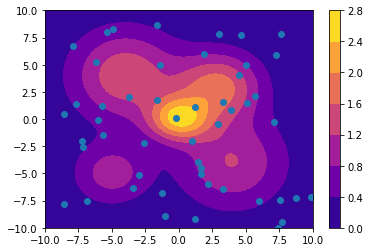

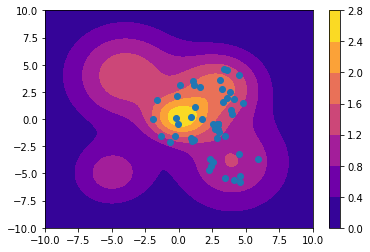

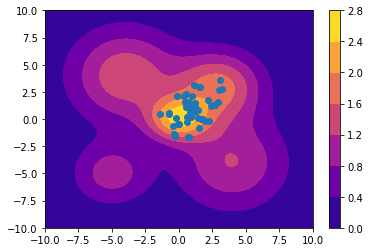

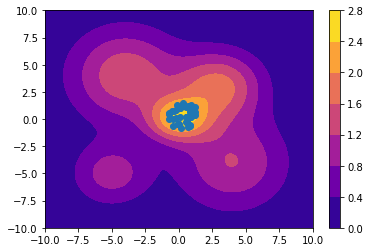

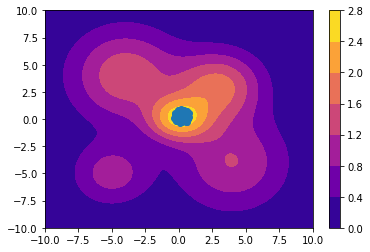

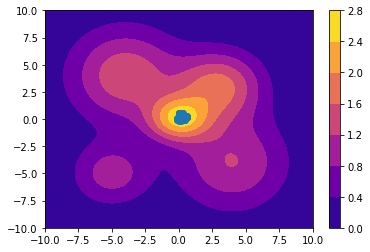

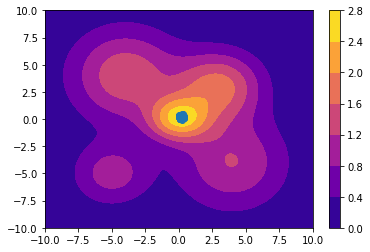

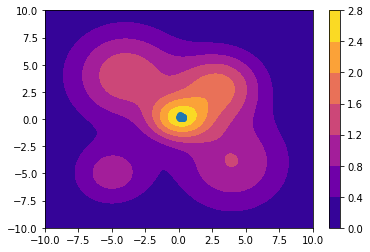

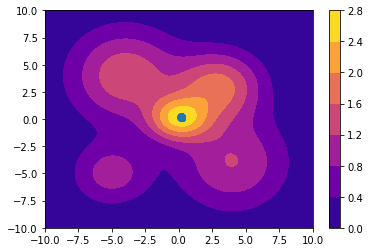

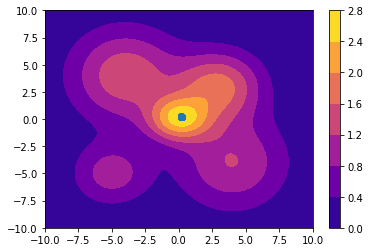

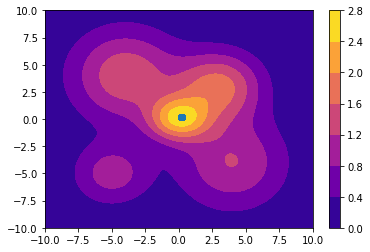

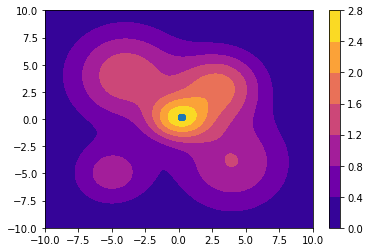


Number of iteratons : 11
Co-ordinates X and Y : 0.21040024113014605 0.21666864402653777
Maximum value :  2.7259328791467667


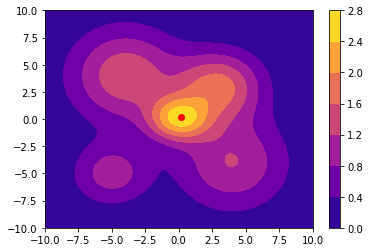

In [152]:
X_min = np.array([-10,-10])
X_max = np.array([10,10])
pop_size = 50
nbhSize = 3
maxiter = 25

Best = stochasticSearch(X_min,X_max,pop_size,nbhSize,maxiter)
print("Co-ordinates X and Y :",Best[0],Best[1])
print("Maximum value : ",Best[2])

plt.contourf(map_X,map_Y,map_Z,cmap = 'plasma')
plt.colorbar()
plt.scatter(Best[0],Best[1],color = 'red')
plt.show()

## Question 2

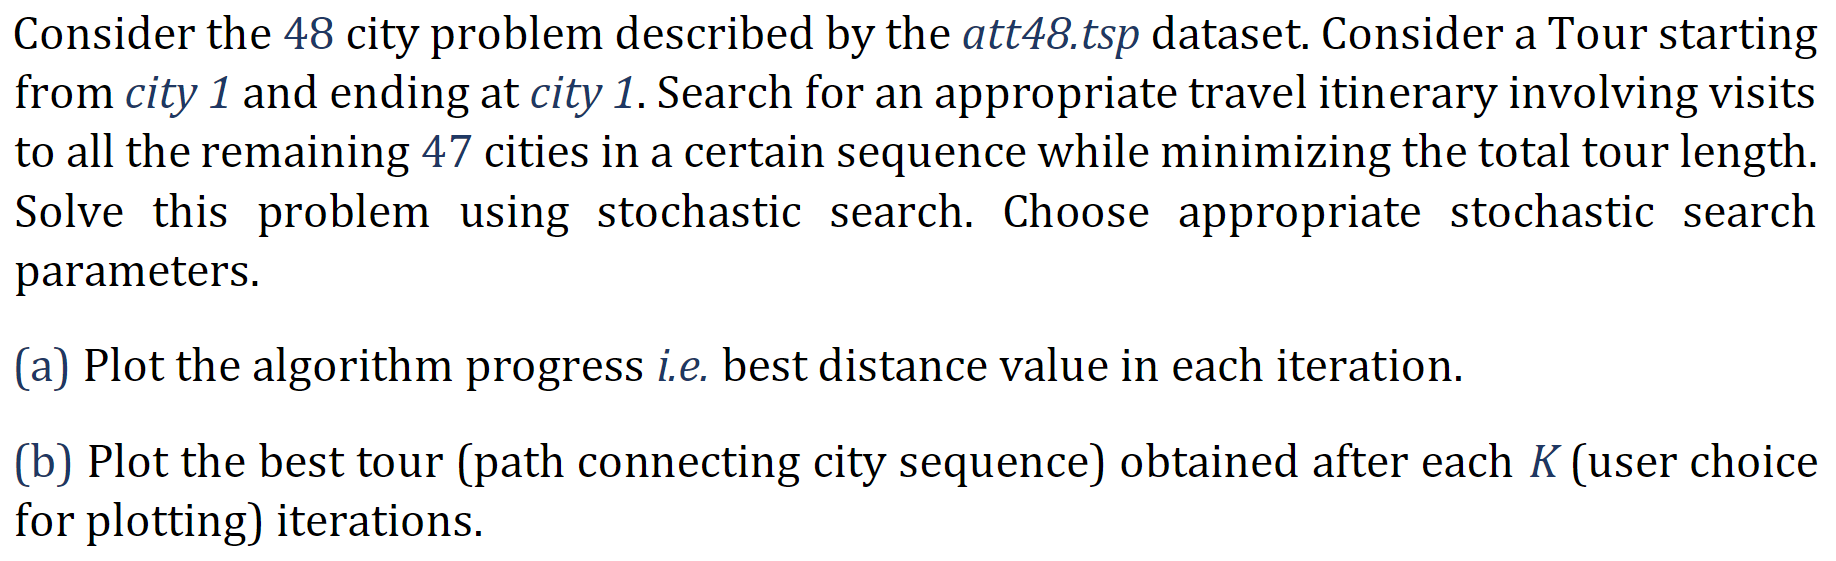

In [127]:
xy = np.loadtxt('att48_xy.txt')
print(xy.shape)
dist = np.loadtxt('att48_d.txt')
print(dist.shape)

(48, 2)
(48, 48)


In [128]:
from numpy.lib.stride_tricks import sliding_window_view

In [129]:
def eval(X):
    cost = []
    for m in X:
        indices = sliding_window_view(m,2)
        #indices = np.row_stack((indices,np.array([indices[-1,-1],indices[0,0]])))
        cost.append(np.sum(dist[indices[:,0],indices[:,1]]))
    return -1*np.array(cost)

In [130]:
def Random_Re_Intialization(no_of_stations,pop_size):
    for i in range(pop_size):
        m = np.arange(no_of_stations)
        np.random.shuffle(m)
        if i == 0:
            X_new = np.array(m)
        else:
            X_new = np.row_stack((X_new,m))
    return X_new

In [131]:
def Random_Linear_Combination(X,no_of_stations):
    for i in range(len(X)):
        x = X[i]
        swap_len = np.random.randint(low = 1,high = 6,size = 1).astype('int')[0]
        start_index = np.random.randint(low = 0, high = no_of_stations,size = 1).astype('int')[0]
        last = swap_len+start_index
        #print(x)
        x = np.concatenate((x[:start_index],np.flip(x[start_index:last]),x[last:]))
        #print(x)
        if i == 0:
            new_X = x
        else:
            new_X = np.row_stack((new_X,x))    
    return new_X        


In [132]:
def Random_Walk(X,P,pop_size,no_of_stations):
    children = np.ceil(P*pop_size).astype('int')
    addition = np.random.randint(low = 3,high = 50,size = len(children))
    children = children + addition
    for i in range(len(X)):
        swaps = np.random.randint(low = 1,high = 3,size = 1)[0]
        for k in range(children[i]):
            child = X[i].copy()
            swap_i = np.random.randint(low = 0,high = no_of_stations,size = swaps)
            swap_j = np.random.randint(low = 0,high = no_of_stations,size = swaps)
            for j in range(swaps):
                child[swap_i[j]],child[swap_j[j]] = child[swap_j[j]],child[swap_i[j]]
            if k == 0 and i == 0:
                new_X = child
            else:
                new_X = np.row_stack((new_X,child)) 
    return new_X

In [133]:
def Search_Sequence(no_of_stations,pop_size,max_iter):
    X = Random_Re_Intialization(no_of_stations,pop_size)
    Y = eval(X)
    print(-1*Y)
    iter = -1
    original_pop_size = pop_size
    for i in range(max_iter):
        #pop_size = int(i*10) + original_pop_size
        iter = i+1
        U = Y - np.min(Y)
        if np.sum(U) == 0:
            break
        P = U/np.sum(U)
        old_X = X.copy()

        S_RW = Random_Walk(X,P,pop_size,no_of_stations)
        #print(S_RW)

        S_RRI = Random_Re_Intialization(no_of_stations,pop_size*10)
        #print(S_RRI)

        S_RLC = Random_Linear_Combination(X,no_of_stations)
        #print(S_RLC)

        new_X = np.row_stack((old_X,S_RW,S_RRI,S_RLC))
        new_Y = eval(new_X)

        best_indices = np.argsort(new_Y)[::-1][:pop_size]
        X = new_X[best_indices]
        Y = new_Y[best_indices]
        print(-1*Y)
    best_index = np.argsort(Y)[::-1][0]    
    print("Number of iterations : ", iter) 
    return X[best_index]

In [143]:
no_of_stations = 48
pop_size = 50
max_iter = 300
X =  Search_Sequence(no_of_stations,pop_size,max_iter)
print(X)

[159344. 142047. 141391. 138479. 159342. 152644. 135197. 135755. 170749.
 163491. 148742. 164016. 149291. 143142. 158420. 149706. 134536. 173137.
 170985. 154560. 171498. 159312. 148310. 157168. 156026. 179152. 155815.
 156035. 154389. 150188. 169823. 159019. 157242. 154783. 153657. 146509.
 160300. 163098. 160713. 143637. 141669. 145323. 146771. 160642. 156614.
 166049. 158242. 150598. 160417. 166258.]
[121952. 126256. 127286. 127692. 128384. 129849. 129906. 130739. 130770.
 131276. 131619. 131765. 131855. 132080. 132240. 132498. 132529. 132749.
 132819. 132851. 132904. 132921. 133000. 133077. 133243. 133243. 133363.
 133590. 133808. 133827. 133831. 133840. 134061. 134076. 134105. 134425.
 134427. 134449. 134529. 134536. 134536. 134541. 134636. 134636. 134645.
 134699. 134871. 134995. 135014. 135070.]
[113471. 114460. 118988. 119537. 119755. 119803. 120055. 120091. 120249.
 120349. 120614. 120827. 121054. 121138. 121138. 121402. 121830. 121858.
 121890. 121952. 121952. 122019. 122191.

Start point :  [ 7611.0 , 5184.0 ]
End point :  [ 401.0 , 841.0 ]


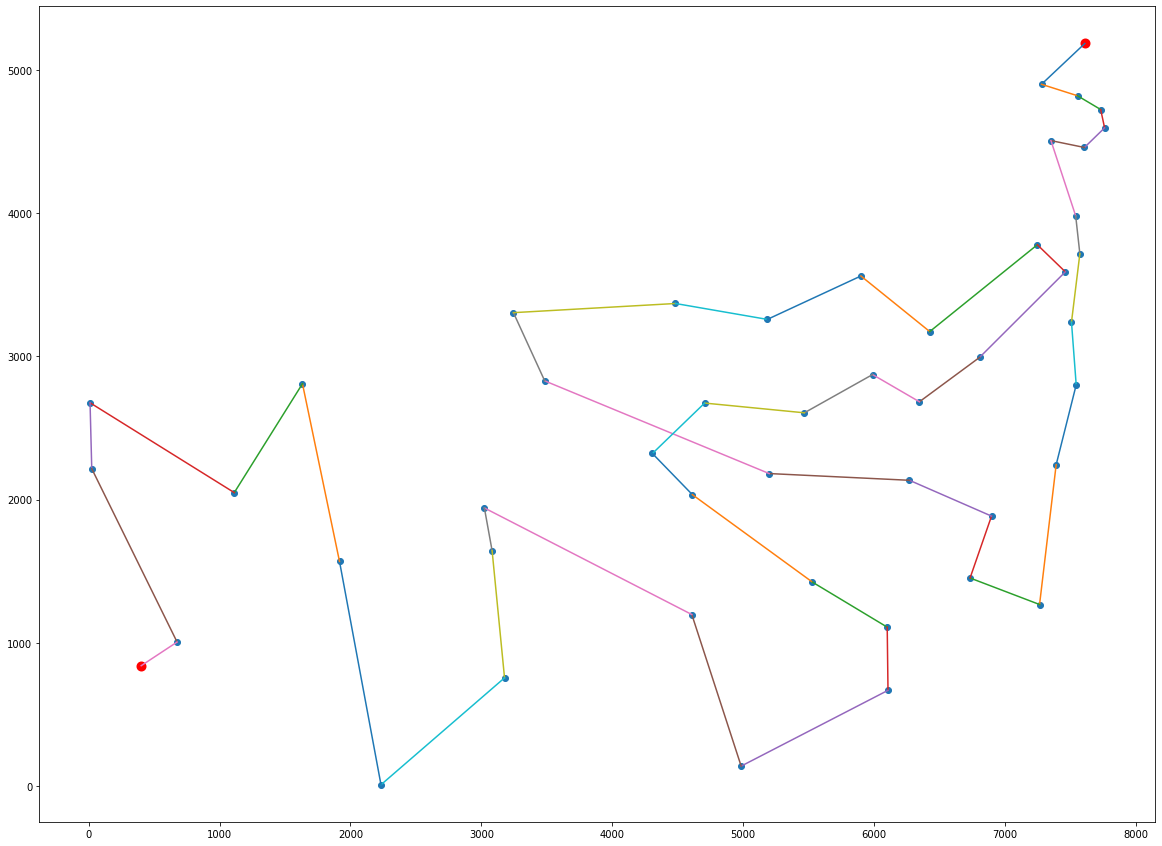

In [144]:
print("Start point : ","[",xy[X[0],0],",",xy[X[0],1],"]")
print("End point : ","[",xy[X[47],0],",",xy[X[47],1],"]")
fig = plt.figure(figsize=(20,15))
plt.scatter(xy[:,0],xy[:,1])
plt.scatter(xy[X[0],0],xy[X[0],1],color = 'red',linewidths=4)
plt.scatter(xy[X[47],0],xy[X[47],1],color = 'red',linewidths=4)
for i in range(0,len(X)-1):
    #print(xy[i:i+2,0])
    start_i = xy[X[i],0]
    start_j = xy[X[i],1]

    end_i = xy[X[i+1],0]
    end_j = xy[X[i+1],1]

    plt.plot([start_i,end_i],[start_j,end_j],label = str(i)+" to "+str(i+1))
#plt.legend()
plt.show()    


In [136]:
swaps = np.random.randint(low = 1,high = 3,size = 1)
swaps

array([2])

In [137]:
m = [1,
8,
38,
31,
44,
18,
7,
28,
6,
37,
19,
27,
17,
43,
30,
36,
46,
33,
20,
47,
21,
32,
39,
48,
5,
42,
24,
10,
45,
35,
4,
26,
2,
29,
34,
41,
16,
22,
3,
23,
14,
25,
13,
11,
12,
15,
40,
9,
1]

In [138]:
m = np.array(m)-1
indices = sliding_window_view(m,2)
print(indices)
indices = np.row_stack((indices,np.array([m[-1],m[0]])))
print(indices)
np.sum(dist[indices[:,0],indices[:,1]])

[[ 0  7]
 [ 7 37]
 [37 30]
 [30 43]
 [43 17]
 [17  6]
 [ 6 27]
 [27  5]
 [ 5 36]
 [36 18]
 [18 26]
 [26 16]
 [16 42]
 [42 29]
 [29 35]
 [35 45]
 [45 32]
 [32 19]
 [19 46]
 [46 20]
 [20 31]
 [31 38]
 [38 47]
 [47  4]
 [ 4 41]
 [41 23]
 [23  9]
 [ 9 44]
 [44 34]
 [34  3]
 [ 3 25]
 [25  1]
 [ 1 28]
 [28 33]
 [33 40]
 [40 15]
 [15 21]
 [21  2]
 [ 2 22]
 [22 13]
 [13 24]
 [24 12]
 [12 10]
 [10 11]
 [11 14]
 [14 39]
 [39  8]
 [ 8  0]]
[[ 0  7]
 [ 7 37]
 [37 30]
 [30 43]
 [43 17]
 [17  6]
 [ 6 27]
 [27  5]
 [ 5 36]
 [36 18]
 [18 26]
 [26 16]
 [16 42]
 [42 29]
 [29 35]
 [35 45]
 [45 32]
 [32 19]
 [19 46]
 [46 20]
 [20 31]
 [31 38]
 [38 47]
 [47  4]
 [ 4 41]
 [41 23]
 [23  9]
 [ 9 44]
 [44 34]
 [34  3]
 [ 3 25]
 [25  1]
 [ 1 28]
 [28 33]
 [33 40]
 [40 15]
 [15 21]
 [21  2]
 [ 2 22]
 [22 13]
 [13 24]
 [24 12]
 [12 10]
 [10 11]
 [11 14]
 [14 39]
 [39  8]
 [ 8  0]
 [ 0  0]]


33551.0